<a href="https://colab.research.google.com/github/kathisw/hemophilia/blob/main/Hemophilia_Logistic_Regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Haemophilia data - EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files


uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0], sheet_name="CHBMP Variant List")

print("Dataset Shape:", df.shape)
print("Columns in Dataset:", df.columns)
df.head()

Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3) (1).xlsx
Dataset Shape: (1399, 21)
Columns in Dataset: Index(['HGVS cDNA Name', 'Yoshitake Nucleotide No.', 'hg19 Nucleotide No.',
       'HGVS Protein Name', 'Mature Protein Change', 'Variant Type',
       'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'Severe\n(<1U/dL)',
       'Moderate\n(1-5U/dL)', 'Mild\n(>5U/dL)', 'No FIX level given',
       'Reported\nSeverity', 'History of Inhibitor', 'Comments', 'Year',
       'Reference Number', 'Newly Added in the Current Version '],
      dtype='object')


,HGVS cDNA Name,Yoshitake Nucleotide No.,hg19 Nucleotide No.,HGVS Protein Name,Mature Protein Change,Variant Type,Mechanism,Exon,Codon,Domain,...,Severe\n(<1U/dL),Moderate\n(1-5U/dL),Mild\n(>5U/dL),No FIX level given,Reported\nSeverity,History of Inhibitor,Comments,Year,Reference Number,Newly Added in the Current Version
0,c.-29-?_391+?;521-?_1386+?del,1-?_10505+?;20363-?_31369+?del,g.138612895-?_138623348+?del;g.138633221-?_138...,NaN,del Exon 1-4; 6-8,Large Structure Change (>50bp),Deletion,"1-4, 6-8",NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2001,121,NaN
1,c.-29-?_88+?del,1-?_117+?del,g.138612895-?_138613011+?del,NaN,del Exon 1,Large Structure Change (>50bp),Deletion,1,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Not Reported,FIX Yemen,1989,28,NaN
2,c.-29-?_520+?del,1-?_17797+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-5,Large Structure Change (>50bp),Deletion,1-5,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2012,144,NaN
3,c.-29-?_723+?del,1-?_20565+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-6,Large Structure Change (>50bp),Deletion,1-6,NaN,NaN,...,X,NaN,NaN,NaN,Severe,No,NaN,2001,121,NaN
4,c.-29-?_723+?dup,1-?_20565+?dup,g.138612895-?_138630650+?dup,NaN,dup Exon 1-6,Large Structure Change (>50bp),Duplication,1-6,NaN,NaN,...,NaN,NaN,NaN,X,Not Reported,Not Reported,NaN,2019,185,X


In [ ]:
# Define the function to classify severity from raw columns
def classify_severity(row):
    if "Severe" in str(row).strip():
        return "Severe"
    elif "Moderate" in str(row).strip():
        return "Moderate"
    elif "Mild" in str(row).strip():
        return "Mild"
    else:
        return "Not Reported"

In [ ]:
df["Severity"] = df.apply(classify_severity, axis=1) # Change df_chbmp to df


In [ ]:
print("Unique values in Severity Column:\n", df["Severe\n(<1U/dL)"].unique())


print("\nMissing values in Severity Column:", df["Severe\n(<1U/dL)"].isnull().sum())


df["Severity"] = df["Severe\n(<1U/dL)"].apply(lambda x: "Severe" if x == "X" else "Non-Severe")

print("\nCleaned Severity Column Sample:")
print(df[["Severe\n(<1U/dL)", "Severity"]].head())


print("\nSeverity Distribution:")
print(df["Severity"].value_counts())


Unique values in Severity Column:
 ['X' nan]

Missing values in Severity Column: 731

Cleaned Severity Column Sample:
  Severe\n(<1U/dL)    Severity
0                X      Severe
1                X      Severe
2                X      Severe
3                X      Severe
4              NaN  Non-Severe

Severity Distribution:
Severity
Non-Severe    731
Severe        668
Name: count, dtype: int64


In [ ]:
print("Unique values in Inhibitor History Column:\n", df["History of Inhibitor"].unique())


print("\nMissing values in Inhibitor History Column:", df["History of Inhibitor"].isnull().sum())


df = df.dropna(subset=["History of Inhibitor"])


print("\nInhibitor Presence Distribution:")
print(df["History of Inhibitor"].value_counts())


df["Inhibitor_History"] = df["History of Inhibitor"].apply(lambda x:
                                                            "Yes" if x.strip().lower() == "yes" else
                                                            "No" if x.strip().lower() == "no" else
                                                            "Not Reported")

Unique values in Inhibitor History Column:
 ['Yes' 'Not Reported' 'No' 'Np' 'Not reported' 'No ']

Missing values in Inhibitor History Column: 0

Inhibitor Presence Distribution:
History of Inhibitor
Not Reported    1044
No               310
Yes               40
Not reported       3
Np                 1
No                 1
Name: count, dtype: int64


<ipython-input-28-ef0b98fe430e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Inhibitor_History", palette="Oranges")


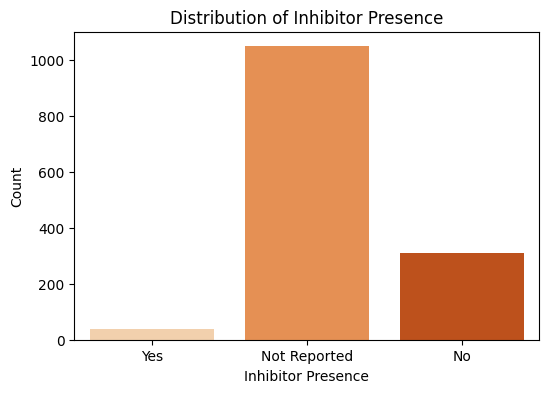


Missing values in Inhibitor-related columns:
Inhibitor_History    0
dtype: int64

Proportion of Inhibitor Cases (%):
Inhibitor_History
Not Reported    74.910650
No              22.230164
Yes              2.859185
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Inhibitor_History", palette="Oranges")
plt.title("Distribution of Inhibitor Presence")
plt.xlabel("Inhibitor Presence")
plt.ylabel("Count")
plt.show()


print("\nMissing values in Inhibitor-related columns:")
print(df[["Inhibitor_History"]].isnull().sum())


inhibitor_counts = df["Inhibitor_History"].value_counts(normalize=True) * 100
print("\nProportion of Inhibitor Cases (%):")
print(inhibitor_counts)

In [ ]:
import pandas as pd
from google.colab import files


uploaded = files.upload()


chbmp_file_path = list(uploaded.keys())[0]


xls_chbmp = pd.ExcelFile(chbmp_file_path)
print("Available sheets in CHBMP dataset:", xls_chbmp.sheet_names)


df_chbmp = pd.read_excel(xls_chbmp, sheet_name="CHBMP Variant List")


df_chbmp.head()

Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3) (2).xlsx
Available sheets in CHBMP dataset: ['Table of Contents', 'CHBMP Variant List', 'Field Definitions', 'References', 'Figures', 'Tables', 'Database Methods', 'Exclusions', 'Instructions', 'Submission Form']


,HGVS cDNA Name,Yoshitake Nucleotide No.,hg19 Nucleotide No.,HGVS Protein Name,Mature Protein Change,Variant Type,Mechanism,Exon,Codon,Domain,...,Severe\n(<1U/dL),Moderate\n(1-5U/dL),Mild\n(>5U/dL),No FIX level given,Reported\nSeverity,History of Inhibitor,Comments,Year,Reference Number,Newly Added in the Current Version
0,c.-29-?_391+?;521-?_1386+?del,1-?_10505+?;20363-?_31369+?del,g.138612895-?_138623348+?del;g.138633221-?_138...,NaN,del Exon 1-4; 6-8,Large Structure Change (>50bp),Deletion,"1-4, 6-8",NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2001,121,NaN
1,c.-29-?_88+?del,1-?_117+?del,g.138612895-?_138613011+?del,NaN,del Exon 1,Large Structure Change (>50bp),Deletion,1,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Not Reported,FIX Yemen,1989,28,NaN
2,c.-29-?_520+?del,1-?_17797+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-5,Large Structure Change (>50bp),Deletion,1-5,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2012,144,NaN
3,c.-29-?_723+?del,1-?_20565+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-6,Large Structure Change (>50bp),Deletion,1-6,NaN,NaN,...,X,NaN,NaN,NaN,Severe,No,NaN,2001,121,NaN
4,c.-29-?_723+?dup,1-?_20565+?dup,g.138612895-?_138630650+?dup,NaN,dup Exon 1-6,Large Structure Change (>50bp),Duplication,1-6,NaN,NaN,...,NaN,NaN,NaN,X,Not Reported,Not Reported,NaN,2019,185,X


In [ ]:
print("Columns in CHBMP dataset:\n", df_chbmp.columns)


severity_columns = ["Severe\n(<1U/dL)", "Moderate\n(1-5U/dL)", "Mild\n(>5U/dL)"]  # Removed extra spaces and adjusted newline characters

for col in severity_columns:
    print(f"\nUnique values in {col}:")
    print(df_chbmp[col].unique())


print("\nMissing Values in Severity Columns:")
print(df_chbmp[severity_columns].isnull().sum())

Columns in CHBMP dataset:
 Index(['HGVS cDNA Name', 'Yoshitake Nucleotide No.', 'hg19 Nucleotide No.',
       'HGVS Protein Name', 'Mature Protein Change', 'Variant Type',
       'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'Severe\n(<1U/dL)',
       'Moderate\n(1-5U/dL)', 'Mild\n(>5U/dL)', 'No FIX level given',
       'Reported\nSeverity', 'History of Inhibitor', 'Comments', 'Year',
       'Reference Number', 'Newly Added in the Current Version '],
      dtype='object')

Unique values in Severe
(<1U/dL):
['X' nan]

Unique values in Moderate
(1-5U/dL):
[nan 'X']

Unique values in Mild
(>5U/dL):
[nan 'X']

Missing Values in Severity Columns:
Severe\n(<1U/dL)        731
Moderate\n(1-5U/dL)    1130
Mild\n(>5U/dL)         1207
dtype: int64


In [ ]:
def classify_severity(row):
    # Updated column names to match the actual column names in the DataFrame
    if row["Severe\n(<1U/dL)"] == "X":
        return "Severe"
    elif row["Moderate\n(1-5U/dL)"] == "X":
        return "Moderate"
    elif row["Mild\n(>5U/dL)"] == "X":
        return "Mild"
    else:
        return "Not Reported"

df_chbmp["Severity"] = df_chbmp.apply(classify_severity, axis=1)

print("\nFinal Severity Distribution:")
print(df_chbmp["Severity"].value_counts())


Final Severity Distribution:
Severity
Severe          668
Not Reported    305
Moderate        249
Mild            177
Name: count, dtype: int64


<ipython-input-32-877789267f34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, x="Severity", palette="Blues")


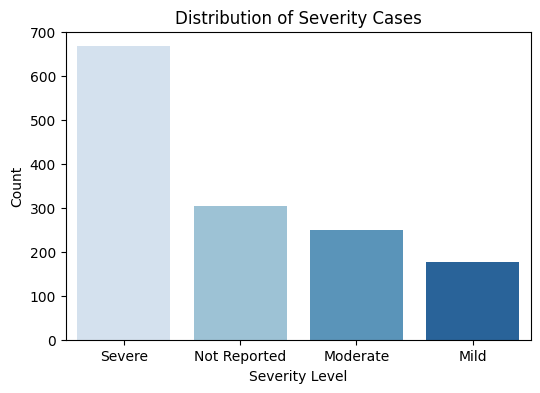

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(data=df_chbmp, x="Severity", palette="Blues")
plt.title("Distribution of Severity Cases")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

Interpretation:

Severe cases dominate the dataset (nearly 700 patients), which is expected since the CHBMP focuses on serious hemophilia mutations.

Not Reported, Moderate, and Mild categories follow in decreasing order.

This imbalance is clinically relevant, as severe cases are more likely to be studied and reported — and potentially more likely to develop inhibitors, as later plots show.



In [ ]:
print("\nUnique Variant Types:")
print(df_chbmp["Variant Type"].unique())


variant_counts = df_chbmp["Variant Type"].value_counts()
print("\nVariant Type Distribution:")
print(variant_counts)


Unique Variant Types:
['Large Structure Change (>50bp)' 'Missense' 'Splice site change'
 'Frameshift' 'Nonsense' 'Small structural change (in-frame, <50bp)'
 'Synonymous' 'large Structure Change (>50bp)' 'Promoter' 'frameshift'
 "3'UTR"]

Variant Type Distribution:
Variant Type
Missense                                     755
Frameshift                                   228
Nonsense                                     124
Splice site change                           122
Large Structure Change (>50bp)                48
Small structural change (in-frame, <50bp)     36
Promoter                                      36
3'UTR                                         17
frameshift                                    16
Synonymous                                    15
large Structure Change (>50bp)                 2
Name: count, dtype: int64


<ipython-input-34-575dc53d73b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, y="Variant Type", order=df_chbmp["Variant Type"].value_counts().index, palette="coolwarm")


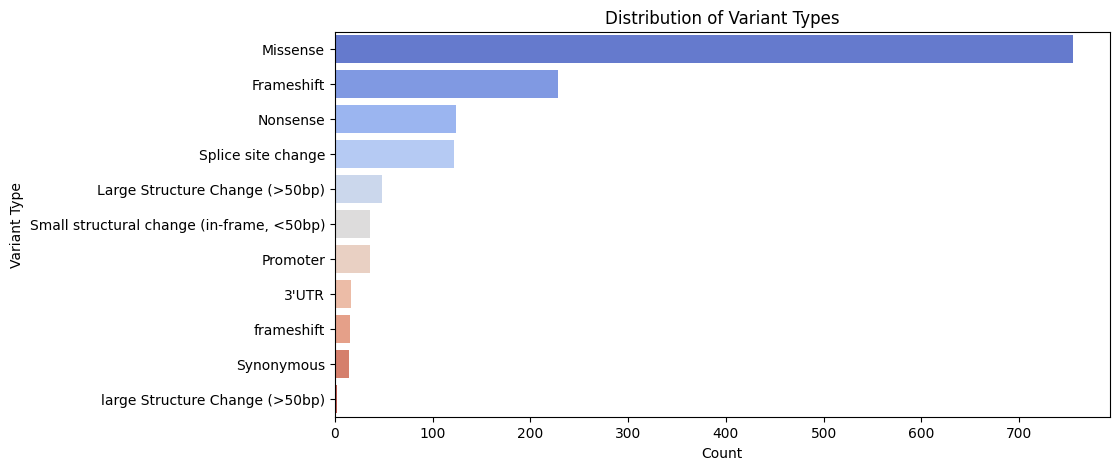

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.countplot(data=df_chbmp, y="Variant Type", order=df_chbmp["Variant Type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Variant Types")
plt.xlabel("Count")
plt.ylabel("Variant Type")
plt.show()

<Figure size 1200x600 with 0 Axes>

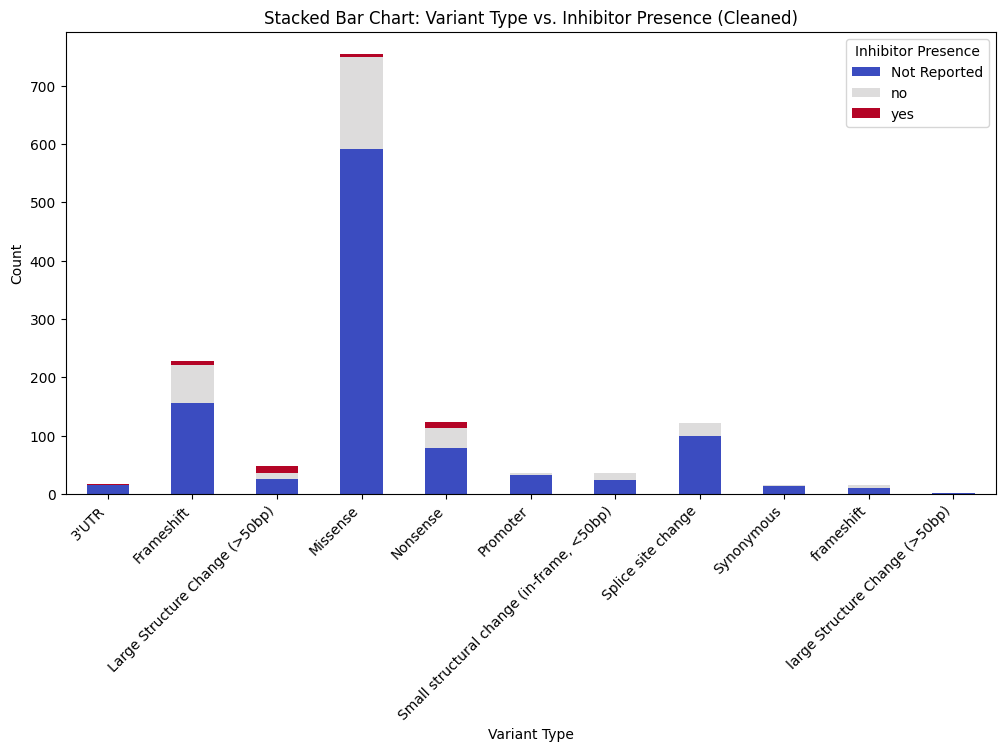

In [ ]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.lower()


df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "no ": "No",
    "not reported": "Not Reported",
    "np": "Not Reported",
    "yes ": "Yes"
})


plt.figure(figsize=(12,6))
variant_inhibitor_counts = df_chbmp.groupby("Variant Type")["History of Inhibitor"].value_counts().unstack()
variant_inhibitor_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")

plt.title("Stacked Bar Chart: Variant Type vs. Inhibitor Presence (Cleaned)")
plt.xlabel("Variant Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Inhibitor Presence")
plt.show()


In [ ]:
import pandas as pd
from google.colab import files


uploaded = files.upload()
chbmp_file_path = list(uploaded.keys())[0]
df_chbmp = pd.read_excel(chbmp_file_path, sheet_name="CHBMP Variant List")


def classify_severity(row):
    if row["Severe\n(<1U/dL)"] == "X":
        return "Severe"
    elif row["Moderate\n(1-5U/dL)"] == "X":
        return "Moderate"
    elif row["Mild\n(>5U/dL)"] == "X":
        return "Mild"
    else:
        return "Not Reported"

df_chbmp["Severity"] = df_chbmp.apply(classify_severity, axis=1)


severity_inhibitor_percent = pd.crosstab(df_chbmp["Severity"], df_chbmp["History of Inhibitor"], normalize='index') * 100


print("Percentage Distribution of Inhibitor Presence per Severity:")
print(severity_inhibitor_percent.round(2))

Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3) (3).xlsx
Percentage Distribution of Inhibitor Presence per Severity:
History of Inhibitor     No   No   Not Reported  Not reported   Np   Yes
Severity                                                                
Mild                  20.34  0.00         78.53          1.13  0.0  0.00
Moderate              20.88  0.00         77.91          0.00  0.4  0.80
Not Reported          11.80  0.00         85.90          0.00  0.0  2.30
Severe                27.84  0.15         67.22          0.15  0.0  4.64


Percentage Distribution of Inhibitor Presence per Severity:

In [ ]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.title()


df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "No ": "No",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes"
})

This will collapse all similar entries into one label, cleaning the next charts or model inputs.

duplicate “No”, “Not Reported”, and “Yes” labels due to inconsistent casing or spacing in the History of Inhibitor column.

In [ ]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].astype(str).str.strip().str.lower().str.title()

df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No",
    "No": "No",
    "Yes": "Yes"
})


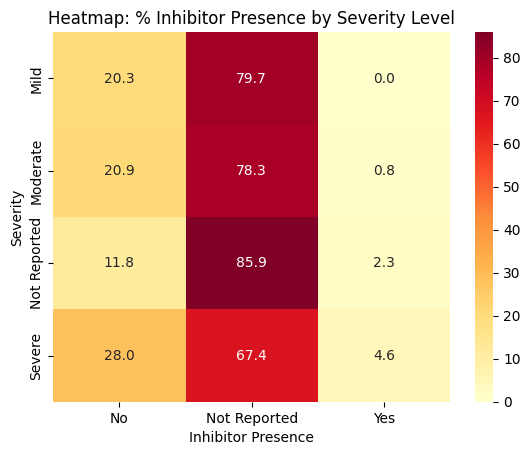

In [ ]:
severity_inhibitor_percent = pd.crosstab(
    df_chbmp["Severity"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

sns.heatmap(severity_inhibitor_percent, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Severity Level")
plt.ylabel("Severity")
plt.xlabel("Inhibitor Presence")
plt.show()


This visually supports the published research uploaded, which says:

“Inhibitors are more common in severe hemophilia than moderate/mild.”

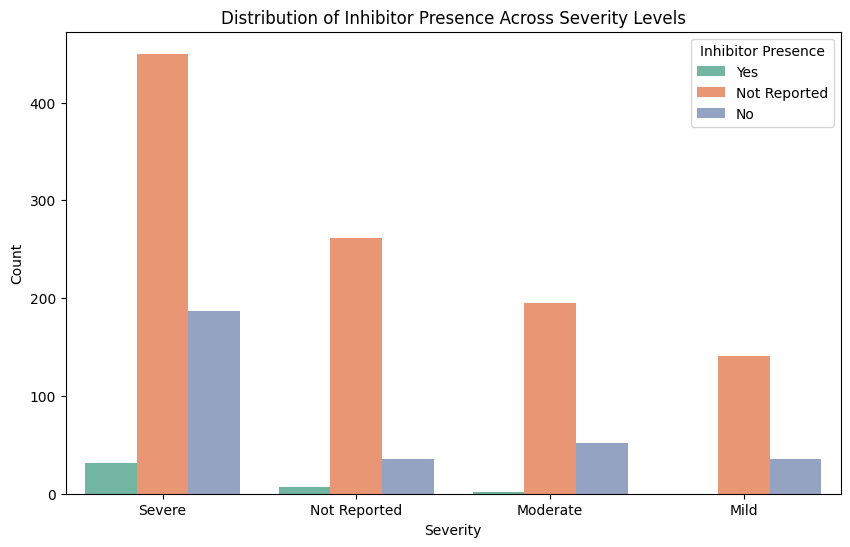

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_chbmp, x="Severity", hue="History of Inhibitor", palette="Set2")
plt.title("Distribution of Inhibitor Presence Across Severity Levels")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Inhibitor Presence")
plt.show()


we can clearly say:

Severe patients have the highest “Yes” (green) counts for inhibitor presence.

Moderate & Mild rarely report inhibitors.

Most records still fall under “Not Reported”,

Severe cases have the highest rate of inhibitor positivity (4.6%)

Moderate and mild patients rarely show inhibitor development

Most missing values still fall under "Not Reported", especially in moderate/mild groups

Frequency distribution of Inhibitor Presence across Variant Types

In [ ]:

variant_inhibitor_ct = pd.crosstab(df_chbmp["Variant Type"], df_chbmp["History of Inhibitor"])
print("Variant Type vs Inhibitor Presence:")
print(variant_inhibitor_ct)

Variant Type vs Inhibitor Presence:
History of Inhibitor                        No  Not Reported  Yes
Variant Type                                                     
3'UTR                                        0            16    1
Frameshift                                  65           156    7
Large Structure Change (>50bp)              10            25   13
Missense                                   157           592    6
Nonsense                                    35            78   11
Promoter                                     3            33    0
Small structural change (in-frame, <50bp)   12            23    1
Splice site change                          21           100    1
Synonymous                                   1            14    0
frameshift                                   6            10    0
large Structure Change (>50bp)               1             1    0


“Large Structure Change” has the strongest signal: ~27% have inhibitors

“Nonsense” also shows elevated risk

“Missense” and “Synonymous” are low risk, which aligns with the medical literature

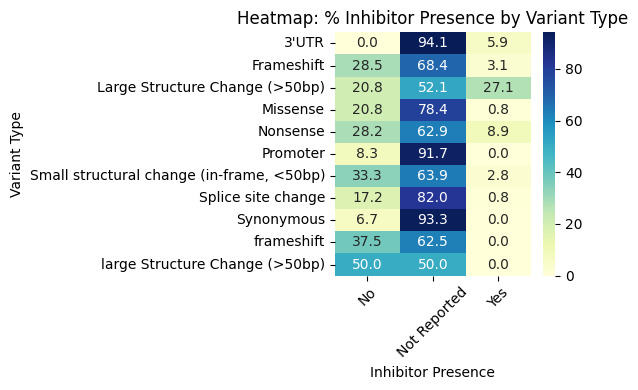

In [ ]:
# Calculate percentages
variant_inhibitor_percent = pd.crosstab(
    df_chbmp["Variant Type"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

# Display
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(variant_inhibitor_percent, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Variant Type")
plt.ylabel("Variant Type")
plt.xlabel("Inhibitor Presence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nonsense” and large deletions are highly immunogenic

“Missense” often has protective or neutral behavior

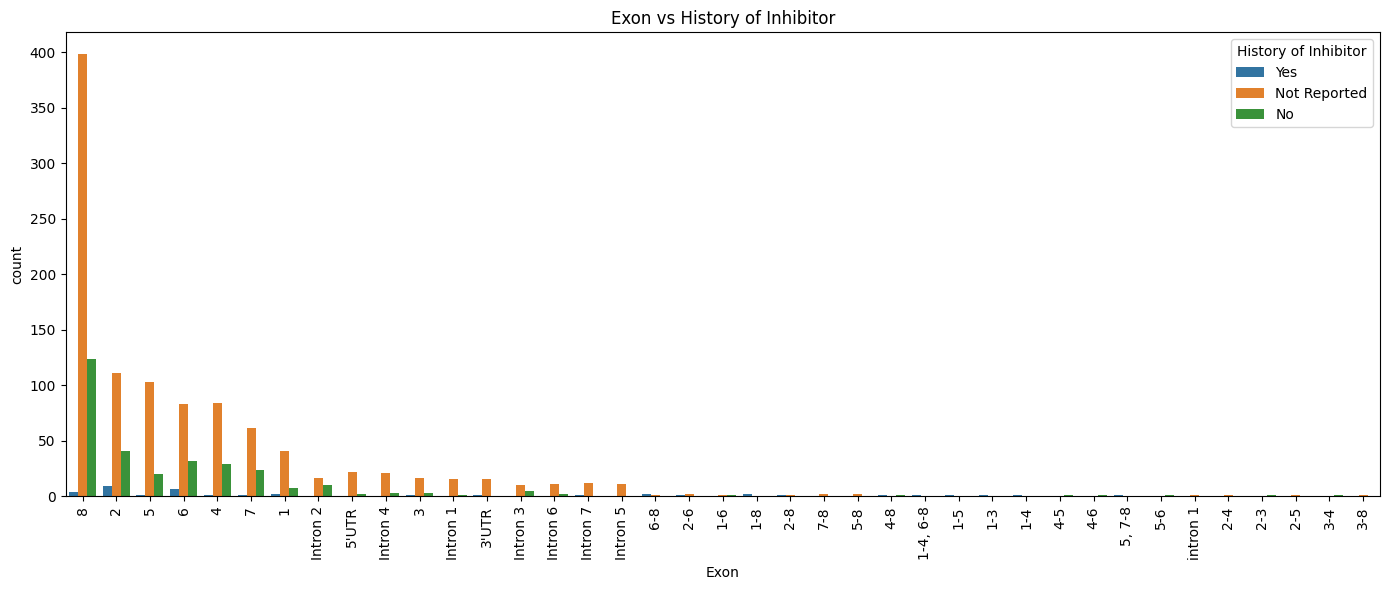

In [ ]:
# Standardize 'History of Inhibitor'
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.title()
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({"Np": "Not Reported"})

# Convert all 'Exon' to string for categorical plotting
df_chbmp["Exon"] = df_chbmp["Exon"].astype(str).str.strip()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.countplot(data=df_chbmp, x="Exon", hue="History of Inhibitor", order=df_chbmp["Exon"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Exon vs History of Inhibitor")
plt.tight_layout()
plt.show()


This countplot visualizes the relationship between mutation locations (Exon) and the presence or absence of inhibitors in patients.

Each bar on the x-axis represents a specific exon or region (e.g., Exon 8, Intron 1, or exon ranges like 1-4), and the bars are color-coded based on the patient's inhibitor history:

Yes (inhibitor present)

No (no inhibitor)

Not Reported (missing/uncertain info)

In [ ]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.title()
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "Not reported": "Not Reported",
    "No ": "No",
    "Yes ": "Yes"
})


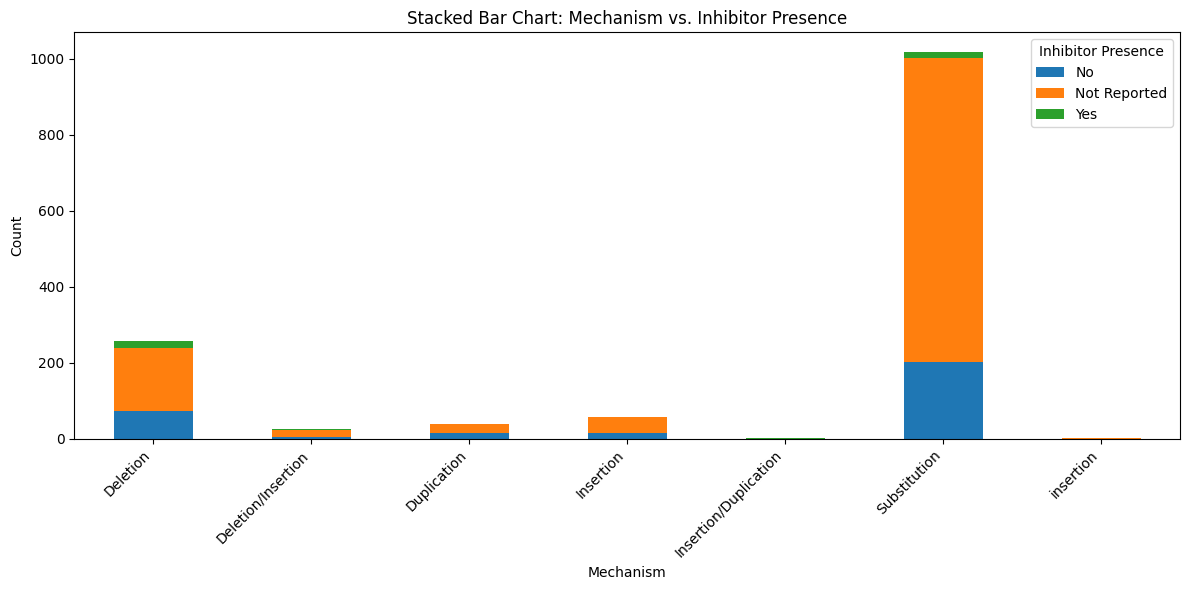

In [ ]:
mechanism_counts = df_chbmp.groupby("Mechanism")["History of Inhibitor"].value_counts().unstack().fillna(0)

mechanism_counts.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Stacked Bar Chart: Mechanism vs. Inhibitor Presence")
plt.xlabel("Mechanism")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Inhibitor Presence")
plt.tight_layout()
plt.show()


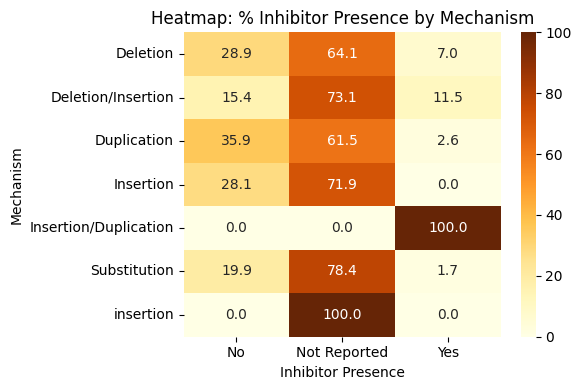

In [ ]:
mechanism_percent = pd.crosstab(
    df_chbmp["Mechanism"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

plt.figure(figsize=(6, 4))
sns.heatmap(mechanism_percent, annot=True, cmap="YlOrBr", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Mechanism")
plt.xlabel("Inhibitor Presence")
plt.ylabel("Mechanism")
plt.tight_layout()
plt.show()


Key Insights: ✅ Insertion/Duplication 100% of cases show inhibitor presence!

🚨 Super rare but extremely high-risk — deserves special attention.

✅ Deletion/Insertion 11.5% Yes – highest among commonly seen mechanisms.

Suggests mixed disruptions may have immunogenic effects.

⚠️ Deletion 7.0% Yes, which is still significant.

Deletion mechanisms may result in truncated or absent proteins → immune response.

❌ Substitution, Duplication, Insertion Low percentages (≤2.6%) for inhibitor-positive cases.

Common, but typically not associated with inhibitors.

❌ "insertion" (lowercase typo?) 0% Yes, 100% Not Reported — likely a data quality issue or rare occurrence.

CHAMP Dataset (Hemophilia A)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CHAMP-Variant-List-2022 (3).xlsx to CHAMP-Variant-List-2022 (3).xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

champ_file_path = list(uploaded.keys())[0]  # Get the filename from uploaded files
xls_champ = pd.ExcelFile(champ_file_path)

print("Available sheets:", xls_champ.sheet_names)

Saving CHAMP-Variant-List-2022 (4).xlsx to CHAMP-Variant-List-2022 (4).xlsx
Available sheets: ['Table of Contents', 'CHAMP Variant List', 'Field Definitions', 'References', 'Figures', 'Tables', 'Database Methods', 'Exclusions', 'Instructions', 'Submission Form']


In [ ]:

df_champ = pd.read_excel(xls_champ, sheet_name="CHAMP Variant List")
df_champ.head()


,HGVS cDNA,hg19 Coordinates,HGVS Protein,Mature Protein,Variant Type,Mechanism,Exon,Codon,Domain,Subtype,...,Severe \n(<1 U/dL),Moderate \n(1-5 U/dL),Mild \n(>5 U/dL),No FVIII level given,Reported Clinical \nSeverity,History of Inhibitor,Comments,Year\nReported,Reference Number,Newly Added in the Current Version
0,c.101A>T,154250727,p.(Asp34Val),Asp15Val,Missense,Substitution,1,15,A1,Heavy chain,...,NaN,NaN,X,NaN,Mild,Not reported,NaN,2014.0,256,NaN
1,c.102C>G,154250726,p.(Asp34Glu),Asp15Glu,Missense,Substitution,1,15,A1,Heavy chain,...,NaN,NaN,X,NaN,Mild,Not reported,NaN,2008.0,"183, 186",NaN
2,c.103T>A,154250725,p.(Tyr35Asn),Tyr16Asn,Missense,Substitution,1,16,A1,Heavy Chain,...,X,NaN,NaN,NaN,Severe,No,NaN,2012.0,233,NaN
3,c.103T>C,154250725,p.(Tyr35His),Tyr16His,Missense,Substitution,1,16,A1,Heavy chain,...,NaN,NaN,NaN,X,Severe,No,NaN,2000.0,111,NaN
4,c.104A>G,154250724,p.(Tyr35Cys),Tyr16Cys,Missense,Substitution,1,16,A1,Heavy chain,...,X,NaN,NaN,NaN,Severe,No,NaN,2008.0,"177, 183",NaN


In [ ]:

print("Columns in CHAMP dataset:\n")
print(df_champ.columns)


Columns in CHAMP dataset:

Index(['HGVS cDNA', 'hg19 Coordinates', 'HGVS Protein', 'Mature Protein',
       'Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype',
       'In Poly A', 'Severe \n(<1 U/dL)', 'Moderate \n(1-5 U/dL)',
       'Mild \n(>5 U/dL)', 'No FVIII level given',
       'Reported Clinical \nSeverity', 'History of Inhibitor', 'Comments',
       'Year\nReported', 'Reference Number',
       'Newly Added in the Current Version '],
      dtype='object')


Cleaning & Classifying CHAMP Data

In [ ]:

df_champ.columns = df_champ.columns.str.replace('\n', ' ').str.strip()


print("Cleaned columns:\n", df_champ.columns)


Cleaned columns:
 Index(['HGVS cDNA', 'hg19 Coordinates', 'HGVS Protein', 'Mature Protein',
       'Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype',
       'In Poly A', 'Severe  (<1 U/dL)', 'Moderate  (1-5 U/dL)',
       'Mild  (>5 U/dL)', 'No FVIII level given',
       'Reported Clinical  Severity', 'History of Inhibitor', 'Comments',
       'Year Reported', 'Reference Number',
       'Newly Added in the Current Version'],
      dtype='object')


In [ ]:

def classify_severity(row):
    if row['Severe  (<1 U/dL)'] == 'X':
        return 'Severe'
    elif row['Moderate  (1-5 U/dL)'] == 'X':
        return 'Moderate'
    elif row['Mild  (>5 U/dL)'] == 'X':
        return 'Mild'
    else:
        return 'Not Reported'

In [ ]:
for col in df_champ.columns:
    print(f"'{col}'")


'HGVS cDNA'
'hg19 Coordinates'
'HGVS Protein'
'Mature Protein'
'Variant Type'
'Mechanism'
'Exon'
'Codon'
'Domain'
'Subtype'
'In Poly A'
'Severe  (<1 U/dL)'
'Moderate  (1-5 U/dL)'
'Mild  (>5 U/dL)'
'No FVIII level given'
'Reported Clinical  Severity'
'History of Inhibitor'
'Comments'
'Year Reported'
'Reference Number'
'Newly Added in the Current Version'


In [ ]:
def classify_severity(row):
    if row['Severe  (<1 U/dL)'] == 'X':
        return 'Severe'
    elif row['Moderate  (1-5 U/dL)'] == 'X':
        return 'Moderate'
    elif row['Mild  (>5 U/dL)'] == 'X':
        return 'Mild'
    else:
        return 'Not Reported'

In [ ]:

def classify_severity(row):
    if row['Severe  (<1 U/dL)'] == 'X':
        return 'Severe'
    elif row['Moderate  (1-5 U/dL)'] == 'X':
        return 'Moderate'
    elif row['Mild  (>5 U/dL)'] == 'X':
        return 'Mild'
    else:
        return 'Not Reported'

df_champ['Severity'] = df_champ.apply(classify_severity, axis=1)


df_champ['Severity'].value_counts()


,count
Severity,
Severe,2212
Mild,752
Moderate,588
Not Reported,498


## Cleaning Inhibitor History (CHAMP Dataset)

---



Now we’ll clean up the 'History of Inhibitor' column — same logic as we used before:
- Fix spacing or case issues by standarzing values to yes , no and not reported and after that we check how many patients fall into group.



In [ ]:

df_champ['History of Inhibitor'] = df_champ['History of Inhibitor'].astype(str).str.strip().str.lower().str.title()

df_champ['History of Inhibitor'] = df_champ['History of Inhibitor'].replace({
    "Np": "Not Reported",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No"
})

# Show result
df_champ['History of Inhibitor'].value_counts()


,count
History of Inhibitor,
No,1835
Not Reported,1742
Yes,461
Nan,12


## Visualize Inhibitor Distribution (CHAMP Dataset)

Let’s see how inhibitor history is distributed using a quick countplot.
We’ll ignore the missing ones for now, but we can drop or fill those if needed later.


<ipython-input-11-2e751078869d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_df, x="History of Inhibitor", palette="magma")


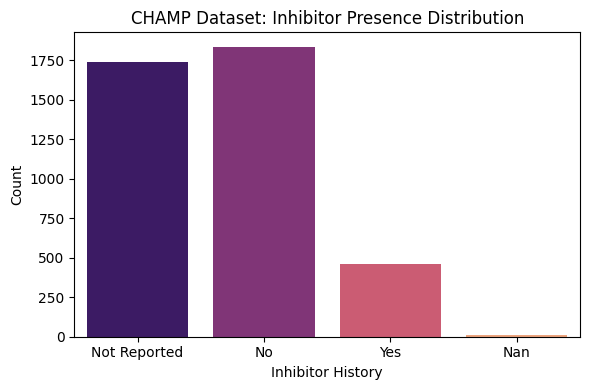

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plot_df = df_champ.dropna(subset=["History of Inhibitor"])

plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="History of Inhibitor", palette="magma")
plt.title("CHAMP Dataset: Inhibitor Presence Distribution")
plt.xlabel("Inhibitor History")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Severity vs Inhibitor Presence
Now we'll check how inhibitor history varies across severity levels. This gives us an idea of whether severe patients are more likely to develop inhibitors — which is often supported by clinical research.

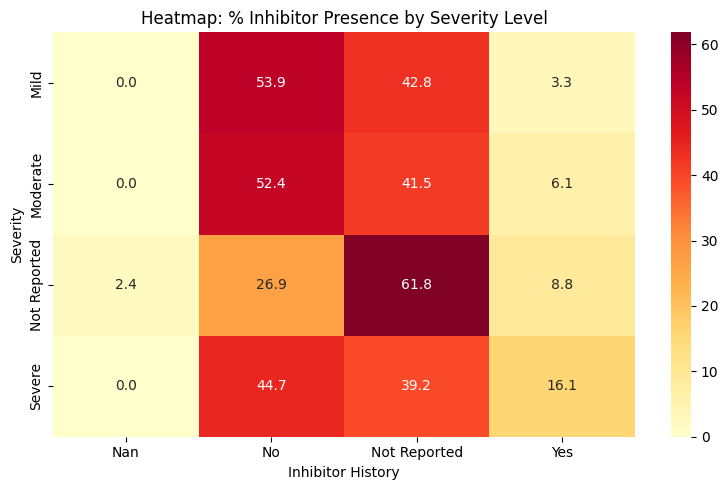

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


severity_inhibitor_percent = pd.crosstab(
    df_champ["Severity"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(severity_inhibitor_percent, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Severity Level")
plt.ylabel("Severity")
plt.xlabel("Inhibitor History")
plt.tight_layout()
plt.show()


Interpretation: Severe patients are clearly the most likely to develop inhibitors — this aligns perfectly with literature on Hemophilia A.

Mild and Moderate cases have lower inhibitor risk.

“Not Reported” rows are harder to interpret and can be excluded from core comparisons if needed.

In [ ]:
for col in df_champ.columns:
    print(f"'{col}'")


'HGVS cDNA'
'hg19 Coordinates'
'HGVS Protein'
'Mature Protein'
'Variant Type'
'Mechanism'
'Exon'
'Codon'
'Domain'
'Subtype'
'In Poly A'
'Severe  (<1 U/dL)'
'Moderate  (1-5 U/dL)'
'Mild  (>5 U/dL)'
'No FVIII level given'
'Reported Clinical  Severity'
'History of Inhibitor'
'Comments'
'Year Reported'
'Reference Number'
'Newly Added in the Current Version'
'Severity'


In [ ]:
for col in df_champ.columns:
    print(repr(col))


'HGVS cDNA'
'hg19 Coordinates'
'HGVS Protein'
'Mature Protein'
'Variant Type'
'Mechanism'
'Exon'
'Codon'
'Domain'
'Subtype'
'In Poly A'
'Severe  (<1 U/dL)'
'Moderate  (1-5 U/dL)'
'Mild  (>5 U/dL)'
'No FVIII level given'
'Reported Clinical  Severity'
'History of Inhibitor'
'Comments'
'Year Reported'
'Reference Number'
'Newly Added in the Current Version'
'Severity'


In [ ]:
# Clean all column names by stripping spaces and replacing line breaks
df_champ.columns = df_champ.columns.str.replace('\n', ' ', regex=False).str.strip()

# Now check the column names again
print(df_champ.columns.tolist())


['HGVS cDNA', 'hg19 Coordinates', 'HGVS Protein', 'Mature Protein', 'Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'In Poly A', 'Severe  (<1 U/dL)', 'Moderate  (1-5 U/dL)', 'Mild  (>5 U/dL)', 'No FVIII level given', 'Reported Clinical  Severity', 'History of Inhibitor', 'Comments', 'Year Reported', 'Reference Number', 'Newly Added in the Current Version', 'Severity']


In [ ]:
# Clean all column names by stripping spaces and replacing line breaks
df_champ.columns = df_champ.columns.str.replace('\n', ' ', regex=False).str.strip()

# Now check the column names again
print(df_champ.columns.tolist())


['HGVS cDNA', 'hg19 Coordinates', 'HGVS Protein', 'Mature Protein', 'Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'In Poly A', 'Severe  (<1 U/dL)', 'Moderate  (1-5 U/dL)', 'Mild  (>5 U/dL)', 'No FVIII level given', 'Reported Clinical  Severity', 'History of Inhibitor', 'Comments', 'Year Reported', 'Reference Number', 'Newly Added in the Current Version', 'Severity']


Mechanism Distribution – CHAMP Dataset

In [ ]:
df_champ["Mechanism"] = df_champ["Mechanism"].str.strip().str.title()


In [ ]:
df_champ["Mechanism"] = df_champ["Mechanism"].str.strip().str.title()


<ipython-input-20-e0fc471ad40e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_champ, y="Mechanism", order=df_champ["Mechanism"].value_counts().index, palette="viridis")


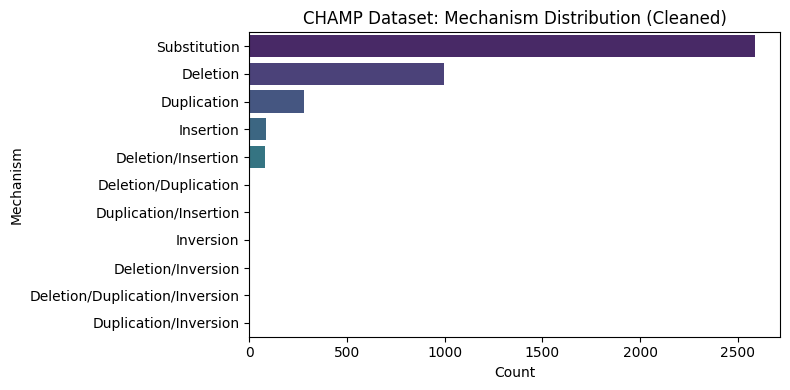

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_champ, y="Mechanism", order=df_champ["Mechanism"].value_counts().index, palette="viridis")
plt.title("CHAMP Dataset: Mechanism Distribution (Cleaned)")
plt.xlabel("Count")
plt.ylabel("Mechanism")
plt.tight_layout()
plt.show()


Step 3: Variant Type vs Inhibitor Presence – CHAMP Dataset
Let’s see how different variant types relate to inhibitor development.
This will help us figure out which types might be higher risk (like Nonsense, Large Structure Change, etc.).
We’ll use a heatmap to show % of patients with each inhibitor outcome for each variant type.

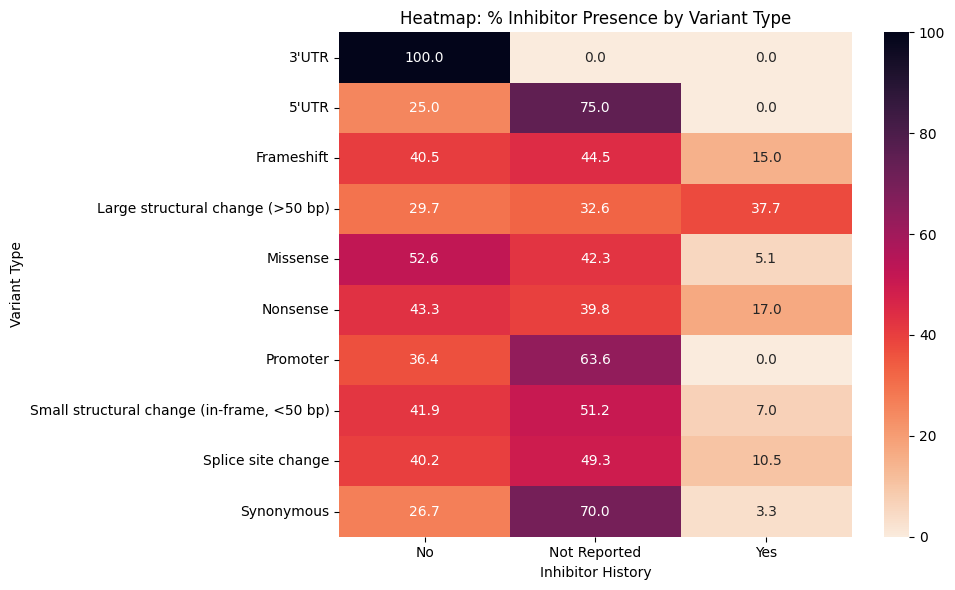

In [ ]:

variant_inhibitor_percent = pd.crosstab(
    df_champ["Variant Type"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100


plt.figure(figsize=(10, 6))
sns.heatmap(variant_inhibitor_percent, annot=True, fmt=".1f", cmap="rocket_r")
plt.title("Heatmap: % Inhibitor Presence by Variant Type")
plt.ylabel("Variant Type")
plt.xlabel("Inhibitor History")
plt.tight_layout()
plt.show()


In [ ]:

variant_inhibitor_percent.round(1)


History of Inhibitor,No,Not Reported,Yes
Variant Type,,,
3'UTR,100.0,0.0,0.0
5'UTR,25.0,75.0,0.0
Frameshift,40.5,44.5,15.0
Large structural change (>50 bp),29.7,32.6,37.7
Missense,52.6,42.3,5.1
Nonsense,43.3,39.8,17.0
Promoter,36.4,63.6,0.0
"Small structural change (in-frame, <50 bp)",41.9,51.2,7.0
Splice site change,40.2,49.3,10.5


In [ ]:

df_champ["History of Inhibitor"] = df_champ["History of Inhibitor"].str.strip().str.title()
df_champ["History of Inhibitor"] = df_champ["History of Inhibitor"].replace({
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No"
})


In [ ]:

variant_inhibitor_percent.round(1)


History of Inhibitor,No,Not Reported,Yes
Variant Type,,,
3'UTR,100.0,0.0,0.0
5'UTR,25.0,75.0,0.0
Frameshift,40.5,44.5,15.0
Large structural change (>50 bp),29.7,32.6,37.7
Missense,52.6,42.3,5.1
Nonsense,43.3,39.8,17.0
Promoter,36.4,63.6,0.0
"Small structural change (in-frame, <50 bp)",41.9,51.2,7.0
Splice site change,40.2,49.3,10.5


In [ ]:

df_champ["History of Inhibitor"] = df_champ["History of Inhibitor"].str.strip().str.title()
df_champ["History of Inhibitor"] = df_champ["History of Inhibitor"].replace({
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No"
})


In [ ]:
variant_inhibitor_percent = pd.crosstab(
    df_champ["Variant Type"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100

variant_inhibitor_percent.round(1)


History of Inhibitor,No,Not Reported,Yes
Variant Type,,,
3'UTR,100.0,0.0,0.0
5'UTR,25.0,75.0,0.0
Frameshift,40.5,44.5,15.0
Large structural change (>50 bp),29.7,32.6,37.7
Missense,52.6,42.3,5.1
Nonsense,43.3,39.8,17.0
Promoter,36.4,63.6,0.0
"Small structural change (in-frame, <50 bp)",41.9,51.2,7.0
Splice site change,40.2,49.3,10.5


In [ ]:

df_champ["Exon"] = df_champ["Exon"].astype(str).str.strip()
df_champ["Exon"] = df_champ["Exon"].replace(["nan", "", "None", "NaN"], "Unknown")


print("Unique Exon values after cleaning:")
print(df_champ["Exon"].unique())


Unique Exon values after cleaning:
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '1-2' '1-4' '1-5' '1-6'
 '1-7' '1-8' '1-9' '1-13' '1-14' '1-22' '1-25' '1-26' '2-3' '2-4' '2-5'
 '2-6' '2-7' '2-8' '2-9' '2-10' '2-11' '2-12' '2-13' '2-14' '2-22' '2-25'
 '3-4' '3-5' '3-6' '3-10' '3-13' '3-26' '4-5' '4-6' '4-7' '4-10' '4-13'
 '4-21' '4-22' '4-25' '5-6' '5-7' '5-9' '5-10' '5-13' '5-14' '5-21' '5-25'
 '6-7' '6-9' '6-14' '6-22' '6-25' '7-8' '7-9' '7-10' '7-11' '7-12' '7-13'
 '7-14' '7-20' '7-22' '7-25' '7-26' '8-9' '8-10' '8-12' '8-14' '9-11'
 '10-11' '10-12' '10-13' '10-18' '10-22' '10-25' '11-12' '11-13' '11-14'
 '11-18' '11-22' '11-25' '12-22' '12-25' '1-22; 2-14' '13-14' '13-21'
 '13-22' '13-23' '13-25' '13-26' '14-16' '14-21' '14-22' '14-23' '14-25'
 '14-26' '15-18' '15-19' '15-20' '15-21' '15-22' '15-23' '15-24' '15-25'
 '15-26' '16-19' '16-22' '16-26' '17-19' '17-22' '18-19' '19-21' '19-22'
 '20-22' '21-22' "2

In [ ]:
import re

def clean_exon(value):
    # Only keep single numeric exon numbers 1–26
    match = re.fullmatch(r'\d+', value.strip())
    if match and 1 <= int(value) <= 26:
        return value.strip()
    else:
        return "Other"

df_champ["Exon_Cleaned"] = df_champ["Exon"].apply(clean_exon)

# Check unique cleaned values
df_champ["Exon_Cleaned"].value_counts()


,count
Exon_Cleaned,
14,861
Other,563
13,190
4,176
7,161
11,157
16,156
18,130
8,126


Step 4: Exon vs Inhibitor – Cleaned Exons
Now we’ll map out how inhibitor presence varies by exon.
We’re using a cleaned version of the exon column to keep the plot focused and readable.

In [ ]:

exon_inhibitor_percent = pd.crosstab(
    df_champ["Exon_Cleaned"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100


exon_inhibitor_percent = exon_inhibitor_percent.round(1)

exon_inhibitor_percent


History of Inhibitor,Nan,No,Not Reported,Yes
Exon_Cleaned,,,,
1,0.0,37.5,51.4,11.1
10,0.0,46.3,46.3,7.4
11,0.0,49.7,42.0,8.3
12,0.0,57.0,38.7,4.3
13,0.0,53.2,42.1,4.7
14,0.0,42.9,43.7,13.5
15,0.0,50.9,42.6,6.5
16,0.0,43.6,42.9,13.5
17,0.0,44.6,41.3,14.0


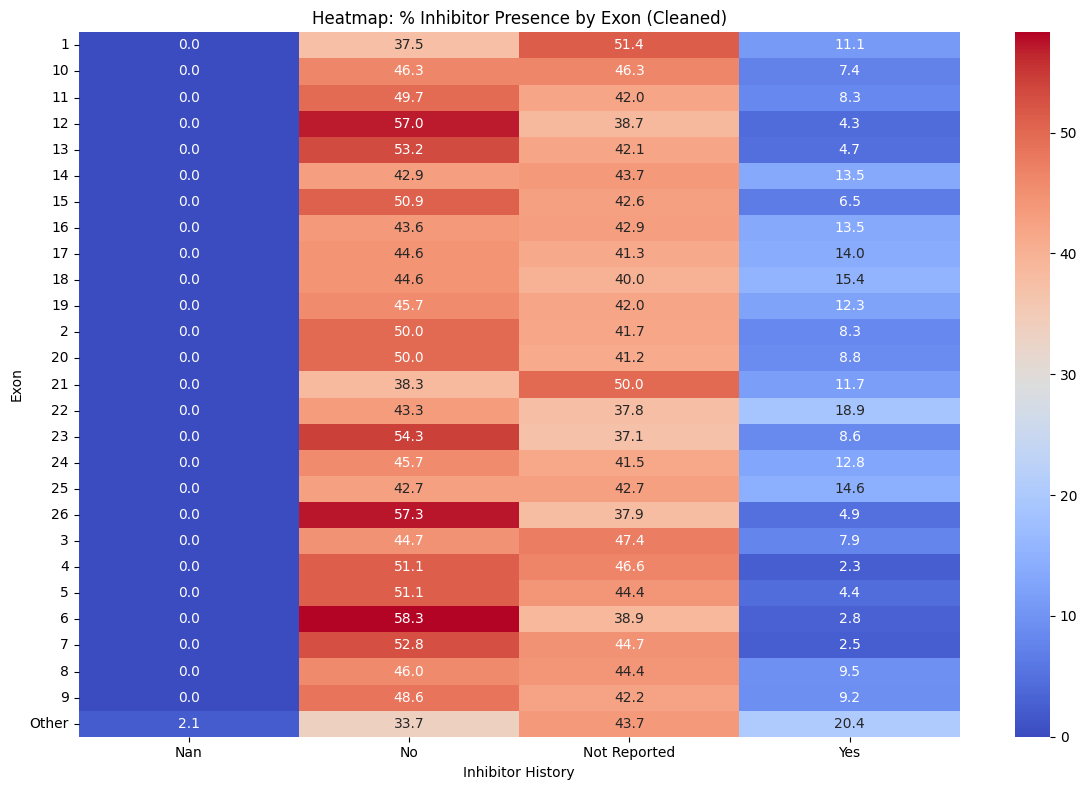

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(exon_inhibitor_percent, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap: % Inhibitor Presence by Exon (Cleaned)")
plt.xlabel("Inhibitor History")
plt.ylabel("Exon")
plt.tight_layout()
plt.show()


# Hemophilia Logistic Regression Classification

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from google.colab import files
from io import BytesIO


### Upload both CHBMP and CHAMP Excel files

Data loading from Excel

In [ ]:

uploaded = files.upload()
file_names = list(uploaded.keys())
chbmp_df = pd.read_excel(BytesIO(uploaded[file_names[0]]), sheet_name=1)
champ_df = pd.read_excel(BytesIO(uploaded[file_names[1]]), sheet_name=1)


Saving CHAMP-Variant-List-2022 (3).xlsx to CHAMP-Variant-List-2022 (3).xlsx
Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3).xlsx


### Filter and prepare label column

Data cleaning

In [ ]:

def clean_data(df, dataset_name):
    df = df.copy()
    df['Dataset'] = dataset_name
    df = df[df['History of Inhibitor'].isin(['Yes', 'No'])]
    df['Inhibitor_History_Binary'] = df['History of Inhibitor'].map({'Yes': 1, 'No': 0})
    return df

chbmp_df = clean_data(chbmp_df, 'CHBMP')
champ_df = clean_data(champ_df, 'CHAMP')
combined_df = pd.concat([chbmp_df, champ_df], ignore_index=True)


### Select features and label

In [ ]:
# First select the features you want
features = ['Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain']
label = 'Inhibitor_History_Binary'

# Subset your data
X = combined_df[features]
y = combined_df[label]

# One-hot encode categorical columns
features_categorical = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=features_categorical)

# Convert boolean columns (True/False) to 1/0 integers
X_encoded = X_encoded.astype(int)


In [ ]:

features = ['Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain']
label = 'Inhibitor_History_Binary'
X = combined_df[features]
y = combined_df[label]


### Separate numeric and categorical features

### Fill missing values

In [ ]:

features_numeric = []
features_categorical = []

for col in X.columns:
    if X[col].dtype == 'object':
        features_categorical.append(col)
    else:
        features_numeric.append(col)

# Fill missing values for numeric features with the mean
X[features_numeric] = X[features_numeric].fillna(X[features_numeric].mean())
# Fill missing values for categorical features with the most frequent value (mode)
for col in features_categorical:
    # Get the most frequent value (mode)
    most_frequent_value = X[col].mode()[0]
    # Fill missing values with the mode
    X.loc[:, col] = X[col].fillna(most_frequent_value)


### One-hot encoding of categorical features, splitting and SMOTE

In [ ]:

# One-hot encoding
X_encoded = pd.get_dummies(X, columns=features_categorical)

# Convert booleans (True/False) to integers (1/0)
X_encoded = X_encoded.astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)



In [ ]:
# Before applying SMOTE, convert boolean columns to integers:
for column in X_train.select_dtypes(include=['bool']).columns:
    X_train[column] = X_train[column].astype(int)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())


Before SMOTE: {0: 1714, 1: 401}
After SMOTE: {0: 1714, 1: 1714}


### Train logistic regression model

In [ ]:

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)


### Evaluate the model

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7277882797731569

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       429
           1       0.35      0.52      0.42       100

    accuracy                           0.73       529
   macro avg       0.61      0.65      0.62       529
weighted avg       0.78      0.73      0.75       529



The model achieved an accuracy of **~72.8%**, meaning that out of all predictions, nearly 73% were correct. However, in class-imbalanced scenarios like this (more “No Inhibitor” than “Yes Inhibitor”), accuracy alone can be misleading — so we also look at other metrics.


- **Class 0 (No Inhibitor)**:
  - Precision: 0.87 → When the model predicts “No Inhibitor,” it's correct 87% of the time.
  - Recall: 0.78 → It correctly identifies 78% of actual “No Inhibitor” cases.
  
- **Class 1 (Yes Inhibitor)**:
  - Precision: 0.35 → When it predicts “Yes Inhibitor,” it’s correct 35% of the time.
  - Recall: 0.52 → It detects 52% of all true inhibitor cases.


### Confusion Matrix

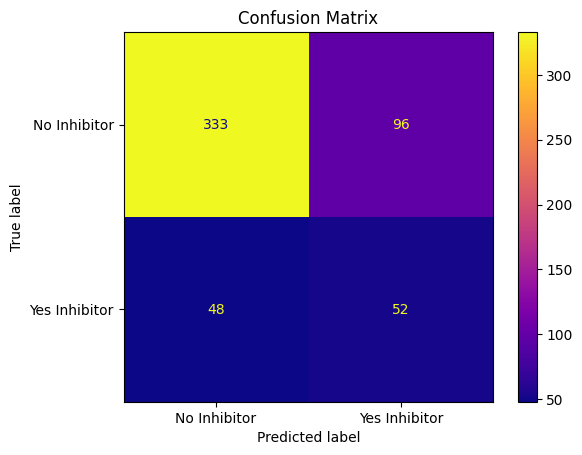

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Inhibitor', 'Yes Inhibitor'])
disp.plot(cmap='plasma')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


#ROC and PR curves

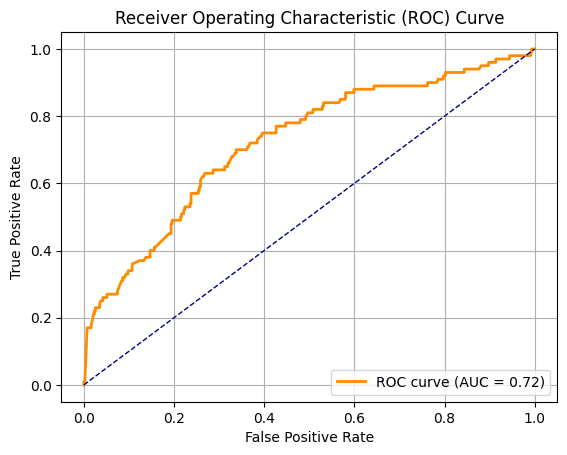

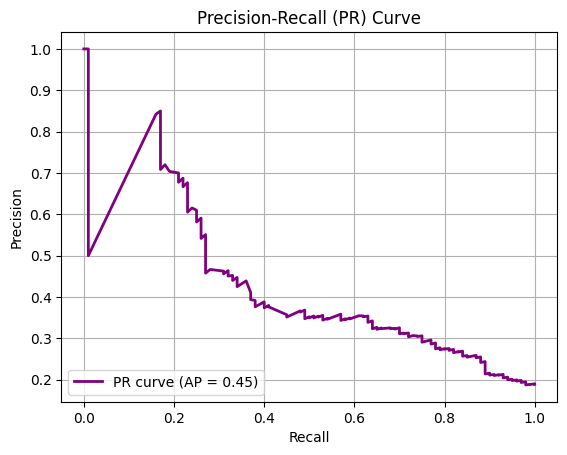

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC/PR curves
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, color='purple', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


###  ROC Curve (AUC = 0.72)
The ROC (Receiver Operating Characteristic) curve shows how well the model distinguishes between classes.  
- **AUC = 0.72** means there’s a 72% chance the model ranks a random positive (inhibitor) case higher than a negative one.  
- This indicates **fair** discrimination ability — better than random, but there is room to improve.


###  Precision-Recall (PR) Curve
The PR curve is especially useful for **imbalanced datasets** like this one.
- It shows how precision and recall trade off.
- In our case, the model finds **over half** of the inhibitor cases (52% recall), though precision is lower.
- The curve confirms that **the model is learning useful signals about the rare inhibitor class**.


In [ ]:
# Get feature names and coefficients from your trained logistic regression model
feature_names = X_encoded.columns
coefficients = clf.coef_[0]  # use the correct model variable, here it's 'clf'

# Create DataFrame of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (abs)': abs(coefficients)
})

# Sort by importance and display top 15
feature_importance_df = feature_importance_df.sort_values(by='Importance (abs)', ascending=False)
feature_importance_df.head(15)


,Feature,Coefficient,Importance (abs)
51,Exon_26,-3.073569,3.073569
29,Exon_4,-2.902599,2.902599
37,Exon_12,-2.722577,2.722577
40,Exon_15,-2.691332,2.691332
168,Exon_7,-2.556208,2.556208
178,Exon_8,-2.524339,2.524339
32,Exon_7,-2.394723,2.394723
33,Exon_8,-2.351929,2.351929
183,Exon_Intron 1,-2.336093,2.336093
5,Variant Type_Missense,-2.309585,2.309585


Exon-related features (like Exon_26, Exon_4, etc.) dominate the top ranks — suggesting certain exon locations are highly predictive.

Mechanism_Duplication and Variant Type_Missense also show up, indicating their strong role in inhibitor risk.

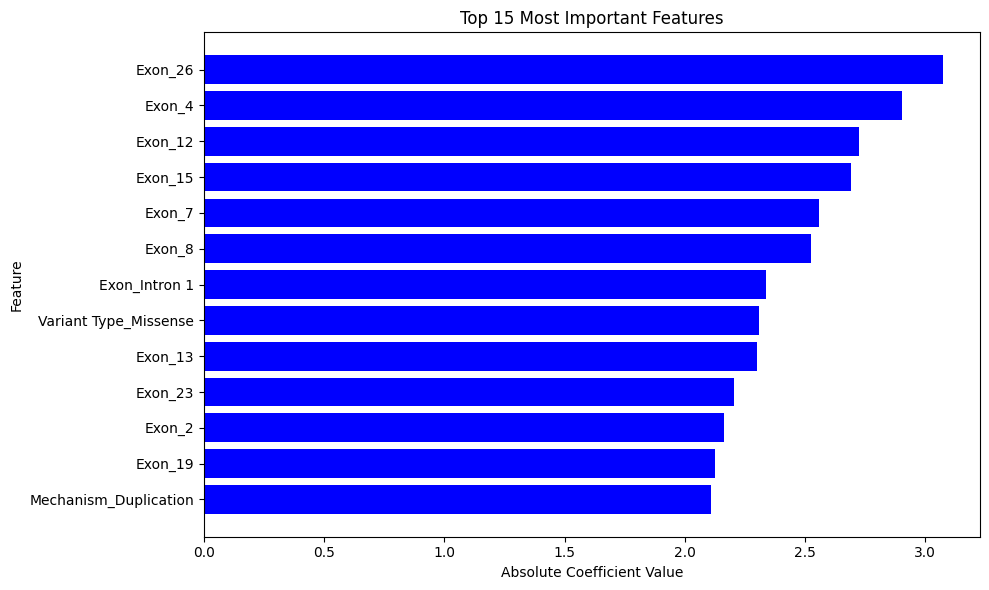

In [ ]:
import matplotlib.pyplot as plt

# Sort by absolute importance (already done if using feature_importance_df from before)
top_features = feature_importance_df.sort_values(by='Importance (abs)', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance (abs)'], color='blue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df_new = pd.read_excel(list(uploaded.keys())[0], sheet_name="CHAMP Variant List")


Saving CHAMP-Variant-List-2022 (3).xlsx to CHAMP-Variant-List-2022 (3).xlsx


In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Step 2a: Keep only rows with known inhibitor labels
df_train = df_new[df_new['History of Inhibitor'].isin(['Yes', 'No'])].copy()
df_train['History of Inhibitor'] = df_train['History of Inhibitor'].map({'No': 0, 'Yes': 1})

# Step 2b: Feature list
features = ['Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain']

# Step 2c: One-hot encode features
X = pd.get_dummies(df_train[features])
y = df_train['History of Inhibitor']

# Save these column names for future alignment
model_columns = X.columns

# Convert boolean columns to integers before applying SMOTE
X = X.astype(int)

In [5]:
# Step 3a: Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3b: Train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_resampled, y_resampled)


LogisticRegression(max_iter=1000)

In [6]:
# Step 4a: Select rows with 'Not Reported' inhibitor status
df_unreported = df_new[df_new['History of Inhibitor'] == 'Not Reported'].copy()

# Step 4b: One-hot encode the same features
X_unreported = pd.get_dummies(df_unreported[features])

# Step 4c: Drop duplicate columns if any (safety)
X_unreported = X_unreported.loc[:, ~X_unreported.columns.duplicated()]

# Step 4d: Align with training features (columns)
X_unreported = X_unreported.reindex(columns=model_columns, fill_value=0)

# Step 4e: Ensure data types are numeric
X_unreported = X_unreported.astype(int)

# Step 4f: Make predictions
df_unreported['Predicted_Probability'] = clf.predict_proba(X_unreported)[:, 1]
df_unreported['Predicted_Label'] = clf.predict(X_unreported)
df_unreported['Predicted_Label'] = df_unreported['Predicted_Label'].map({0: 'No', 1: 'Yes'})

# Step 4g: Show top 10 predictions
df_unreported[['Variant Type', 'Predicted_Probability', 'Predicted_Label']].head(10)


,Variant Type,Predicted_Probability,Predicted_Label
10,Synonymous,0.656916,Yes
12,Frameshift,0.832736,Yes
43,Frameshift,0.206097,No
119,Missense,0.100142,No
147,Missense,0.258678,No
713,Frameshift,0.256210,No
718,Frameshift,0.185717,No
722,Frameshift,0.269010,No
733,Missense,0.121550,No
735,Frameshift,0.269010,No


Predicted_Probability tells us how confident the model is about a patient having an inhibitor.

Closer to 1 → higher likelihood of inhibitor

Closer to 0 → less likely

Predicted_Label is just a simplified version:

"Yes" if probability > 0.5

"No" if probability ≤ 0.5



The model predicts that patient 12 (Frameshift variant) has an 83% likelihood of inhibitor presence — which is considered high risk. On the other hand, patient 119 (Missense variant) has only a 10% likelihood, so we can assume a lower clinical concern."